https://github.com/Tunoc/sem4python_notebooks/blob/master/Week10/exercise/housing.csv  
Download the Boston_housing.csv a) Click the Boston_housing.csv link above. b) Click the Raw button on the right side. c) Right click and press [CTRL] + S or [CMD] + S and download the file.

Exercise1:  

    1)  In the .ipynb convert the bad formatted data to something useable.  
        a)  The following column names are in correct order;  
            column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  
                CRIM - per capita crime rate by town  
                ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
                INDUS - proportion of non-retail business acres per town.  
                CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
                NOX - nitric oxides concentration (parts per 10 million)  
                RM - average number of rooms per dwelling  
                AGE - proportion of owner-occupied units built prior to 1940  
                DIS - weighted distances to five Boston employment centres  
                RAD - index of accessibility to radial highways  
                TAX - full-value property-tax rate per $10,000  
                PTRATIO - pupil-teacher ratio by town  
                B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
                LSTAT - % lower status of the population  
                (Target variable) - MEDV - Median value of owner-occupied homes in $1000's  
    
    2)  Explore the dataset;
        a)  shape/dimensions
        b)  describe
        c)  histogram/bin plot all columns
        d)  "Optional" make heatmap using seaborn(Because it's cool)

    3)  Split the dataset into training and test.
        https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

    4)  Check the accuracy on both the training data and the test data, using .score(x, y)

    5)  Plot target prices(x) vs predicted prices(y)

Made by:
Lucky drawing

In [1]:
import pandas as pd 
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('./exercise/housing.csv', header=None, delimiter=r"\s+", names=column_names) 
#\s+ is everythin that isn't whitespace.
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [2]:
#3.a
print(data.shape)

(506, 14)


In [3]:
#3.b
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

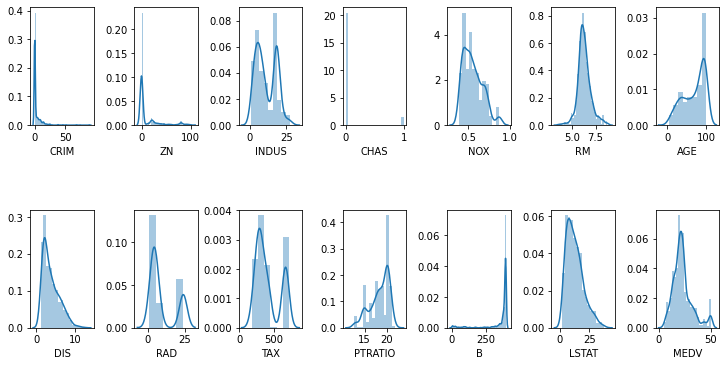

In [4]:
#3.c
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


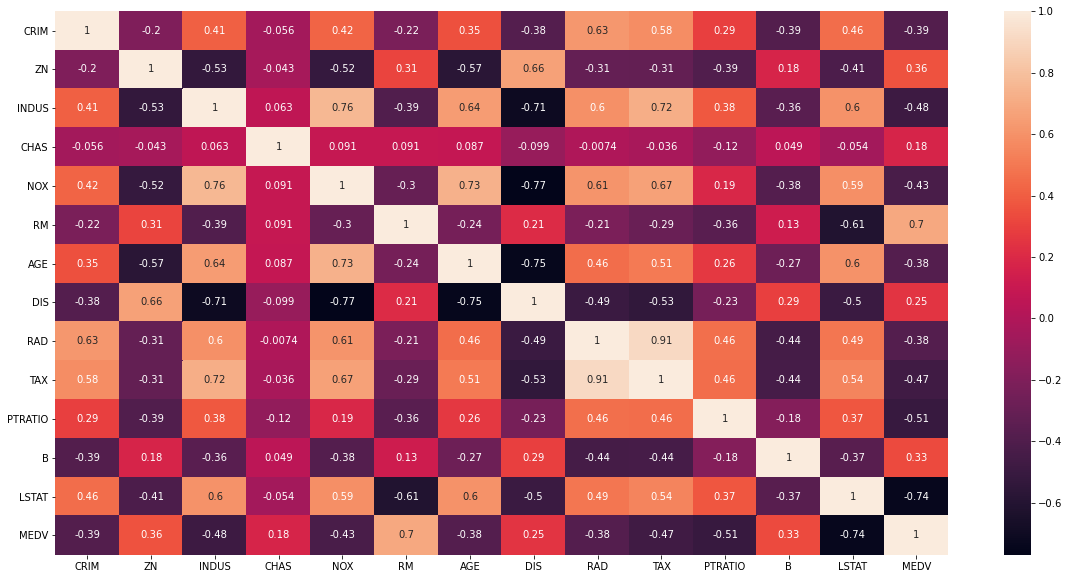

In [5]:
#3.d
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),  annot=True)

In [6]:
#4
from sklearn.model_selection import train_test_split
data_training, data_test, target_training, target_test = train_test_split(
    data.iloc[:,data.columns!="MEDV"], 
    data["MEDV"], 
    random_state=1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Training is for training the model, test is for testing the accuracy of the model on new data.

# print(data_training)
# print(data_test)
# print(target_training)
# print(target_test)

In [7]:
#5 - train the model
from sklearn.linear_model import LinearRegression
import numpy as np

l_regression = LinearRegression()
#.fit trains the model
l_regression.fit(data_training, target_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#5 - test the model
acc_training = l_regression.score(data_training, target_training)
acc_test = l_regression.score(data_test, target_test)

# The reason why we print the model accuracy is to check for over-fitting/under-fitting.
# If the acc_test would have been significantly lower than the acc_training, the result would have been over-fitted.
# There are to many variables, that have influence on the result. Therfore the model became underfitted.
# If we had used a polynomial regression we probably would have better results.

print(acc_training)
print(acc_test)

0.7168057552393374
0.7789410172622855


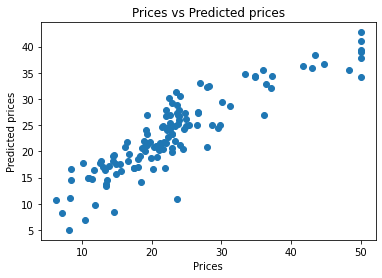

In [9]:
#6 - plot target prices vs predicted prices

# .predict predicts an output for the sample data provided.
predicted = l_regression.predict(data_test)
plt.scatter(target_test, predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


Feature 0: 67.220199
Feature 1: 64.175872
Feature 2: 116.087543
Feature 3: 10.770330
Feature 4: 100.150752
Feature 5: 283.220885
Feature 6: 83.724088
Feature 7: 34.896852
Feature 8: 62.947376
Feature 9: 95.415669
Feature 10: 127.134435
Feature 11: 43.214785
Feature 12: 454.670746


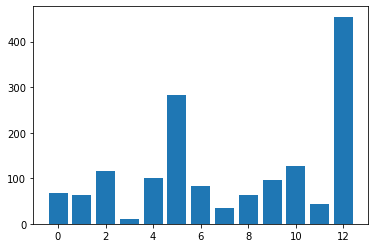

In [10]:
#Extra.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(data_training, target_training)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()